In [ ]:
# Last amended: 13th April, 2024
# Refer: https://python.langchain.com/docs/get_started/introduction/
# It is expected that ollama is already installed

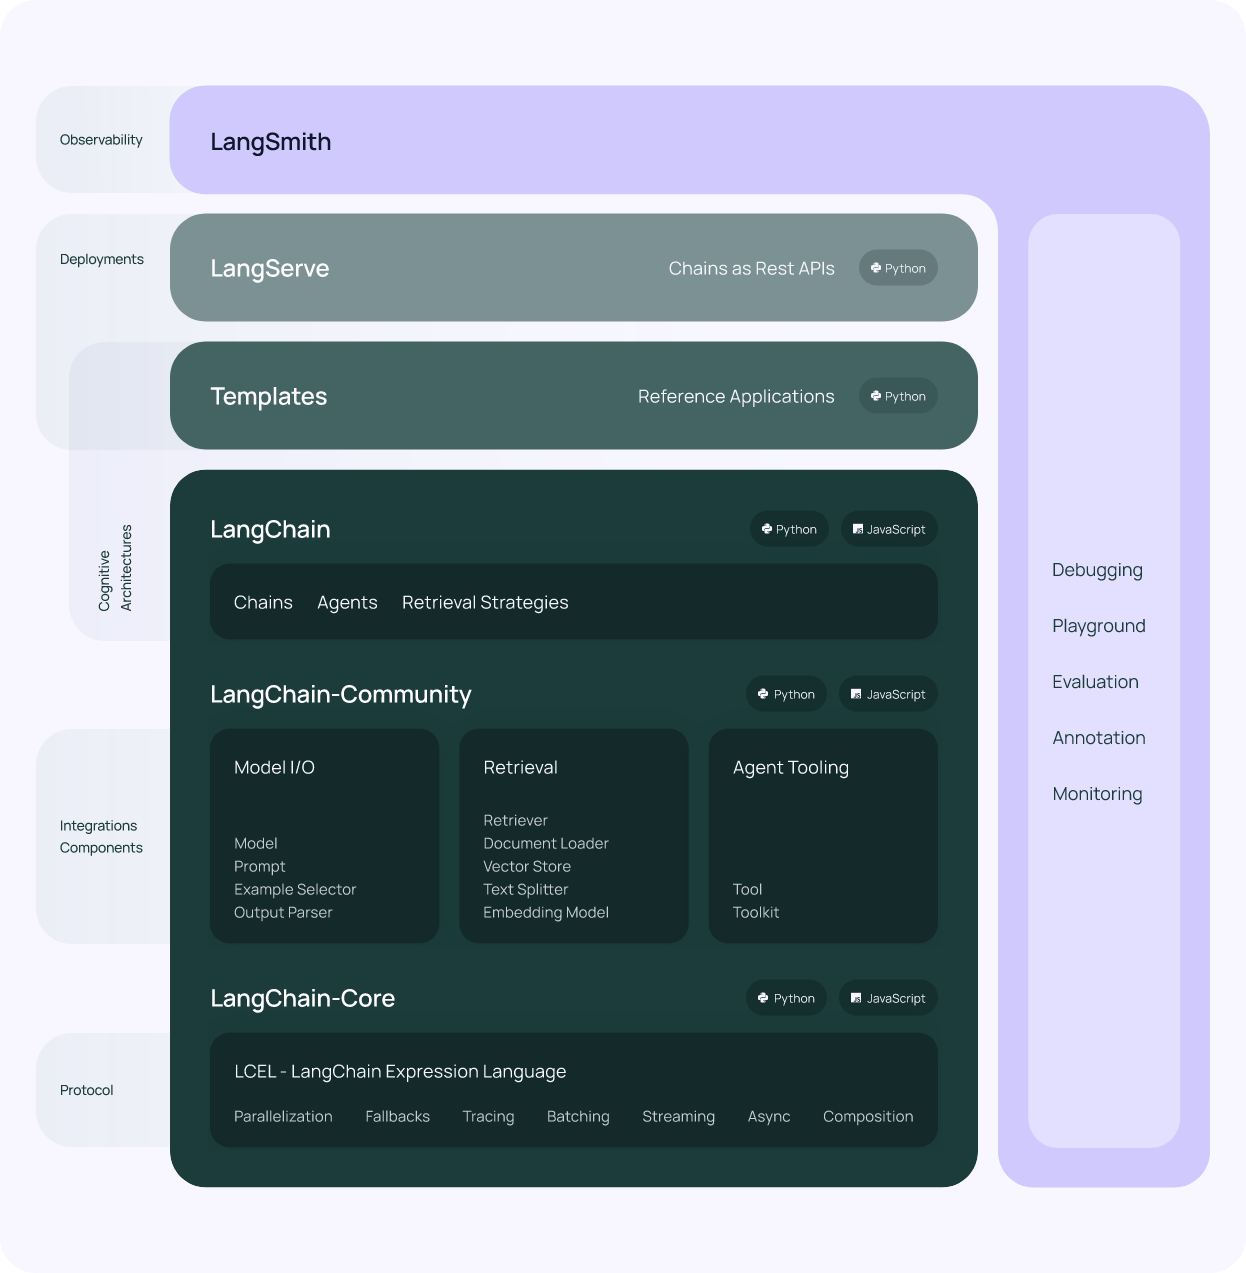

In this [quickstart](https://python.langchain.com/docs/get_started/quickstart/) we'll learn how to:

- Get setup with LangChain, LangSmith and LangServe
- Use the most basic and common components of LangChain: prompt templates, models, and output parsers
- Use LangChain Expression Language, the protocol that LangChain is built on and which facilitates component chaining
- Build a simple application with LangChain
- Trace your application with LangSmith
- Serve your application with LangServe

## Installation

In [ ]:
# Execute if langchain not installed:
#! pip install langchain

In [ ]:
# Check if ollama is running:

!systemctl status ollama

In [ ]:
# Note this does not work as there is way to supply password:

# ! sudo systemctl restart ollama

Make sure the Ollama server is running. After that, you can do:

In [6]:
from langchain_community.llms import Ollama
llm = Ollama(model="llama2")
llm

Ollama()

Once you've installed and initialized the LLM of your choice, we can try using it! Let's ask it what LangSmith is - this is something that wasn't present in the training data so it shouldn't have a very good response.

In [7]:
output = llm.invoke("how can langsmith help with testing?")
print(output)

LangSmith is a language model that can assist with testing in several ways:

1. Automated Testing: LangSmith can be used to generate test cases based on the API documentation of an application. This can save developers time and effort in writing test cases manually.
2. Code Coverage Analysis: LangSmith can analyze the code coverage of an application to identify areas that are not being tested enough. This can help developers prioritize their testing efforts more effectively.
3. Test Data Generation: LangSmith can generate test data based on the API documentation of an application, which can be used to verify the functionality of the application.
4. Test Case Prioritization: LangSmith can prioritize test cases based on their risk and complexity, which can help developers focus their testing efforts on the most critical areas.
5. Defect Prediction: LangSmith can analyze the codebase and identify potential defects, which can help developers proactively address potential issues before they

We can also guide its response with a prompt template. Prompt templates convert raw user input to better input to the LLM.

## What is a system prompt and User messages?
Read [this extensive discussion](https://www.reddit.com/r/LocalLLaMA/comments/19dscer/system_prompts_are_adding_unnecessary_complexity/) on System Prompt on reddit.    
Ref also [here](https://support.netdocuments.com/s/article/System-Message-versus-User-Message)

>While almost all large language models started with the fundamental call-and-response structure of a prompt and completion, that simple structure has evolved over time. Today many models now incorporate two types of messages, which are then combined to form a single prompt. 

>The first type of message is the user message. This is the specific user question or comment that the model responds to. For example, when you interact with generative AI chatbots like ChatGPT, Bard, Claude, or Bing, what you as the user type in is the “user message”.  

>But hidden from your view as a user is another type of message: the system message. The system message determines what role the AI should play and how it should behave generally. When the Bing Chatbot first launched, it famously leaked its own system message, and the revelation demonstrated that system messages can be quite extensive, covering everything from how the model should respond, the tone it should use, when it should redirect the user to another topic, and much more. 

>We can use a few examples to demonstrate how user and system messages work together, and why combining them can be so useful. Let’s start with a user message, without any system message:  

**User Message:**

`What color is the ocean? `

**Completion:**

`The ocean can appear to be many colors, depending on lighting, depth, and the presence of particles or organisms. However, it is most commonly perceived as blue. `

Now, let’s introduce a simple system message and see what happens when we use the same user message:

**System Message:**

`No matter what the user asks, just reply “HODOR”. `

**User Message:**

`What color is the ocean? `

**Completion:**

`HODOR` 

While an admittedly silly example, it shows you the power of system messages. You can really influence the completion with system messages!
More realistically, you might use a system message to control how users within your organization are able to interact with a model: 

**System Message:**

`You are an AI technology built for legal professionals. You only perform tasks related to legal work. For example, you can analyze contracts and draft memos because those are legal tasks. If you are asked to do something that doesn't seem related to legal work, respond with “I’m sorry but I am only able to perform tasks related to legal work.” `


**User Message: **

`Tell me about the history of the Romans `


**Completion: **

`I'm sorry but I am only able to perform tasks related to legal work. `

In contrast, if we provide a user message related to legal work, the model has no problem answering the question: 

**System Message:**

`You are an AI technology built for legal professionals. You only perform tasks related to legal work. For example, you can analyze contracts and draft memos because those are legal tasks. If you are asked to do something that doesn't seem related to legal work, respond with “I’m sorry but I am only able to perform tasks related to legal work.” `


**User Message:**

`What are common areas of negotiation when redlining an NDA? `


**Completion:**

>When redlining a Non-Disclosure Agreement (NDA), there are several common areas of negotiation:

>1. Scope of Confidential Information: Parties often negotiate what exactly constitutes confidential information. It's important to define this as clearly as possible to avoid future disputes. 

>2. Obligations of the Receiving Party: The obligations of the party receiving the confidential information can be a point of negotiation. This can include how the information can be used, who it can be disclosed to, and what steps need to be taken to protect it. 

>3. Duration of the NDA: The length of time the NDA is in effect can be a point of negotiation. Some parties may want a shorter duration, while others may want the NDA to last indefinitely [continued]*

As you can see, system messages provide a powerful tool for designing a prompt.  

Not only can they be useful in controlling the tone and overall behavior of a model, system messages can also provide an easy way to segment your instructions from the content you want the model to apply those instructions to. 

For example, we can enter the instructions for analyzing a contract as the system message and the contract we want analyzed as the user message: 

**System Message:**

>1. Carefully review each clause contained in the AGREEMENT TEXT.

>2. For each clause, provide the following entities: "Clause Type", "Summary", "Favors Company". 

>3. The CLAUSE TYPE entity is the type of clause. For example, "Clause Type: Mutual Indemnity" or "Clause Type: Notice". 

>4. The SUMMARY provides an extremely short summary of the clause's contents.  

>5. The FAVORS COMPANY entity indicates if the clause is favorable to the Company. This entity is either True or False. For example, "Favors Company: True" or "Favors Company: False". 

>6. If you are unsure or don't know about one or more entities for a clause, respond with "Unknown". For example, "Clause Type: Unknown".</i>


**User Message:**

>AGREEMENT TEXT: 

>1. SAAS SERVICES AND SUPPORT 

>1.1 Subject to the terms of this Agreement, Company will use commercially reasonable efforts to provide Customer the Services. As part of the registration process, Customer will identify an administrative user name and password for Customer’s Company account.  Company reserves the right to refuse registration of, or cancel passwords it deems inappropriate. 

>1.2 Subject to the terms hereof, Company will provide Customer with reasonable technical support services in accordance with the terms set forth in Exhibit C.  

>2. CONFIDENTIALITY; PROPRIETARY RIGHTS 

>2.1 Each party (the “Receiving Party”) understands that the other party (the “Disclosing Party”) has disclosed or may disclose business, technical or financial information relating to the Disclosing Party’s business (hereinafter referred to as “Proprietary Information” of the Disclosing Party).  Proprietary Information of Company includes non-public information regarding features, functionality and performance of the Service.  Proprietary Information of Customer includes non-public data provided by Customer to Company to enable the provision of the Services (“Customer Data”). The Receiving Party agrees: (i) to take reasonable precautions to protect such Proprietary Information, and (ii) not to use (except in performance of the Services or as otherwise permitted herein) or divulge to any third person any such Proprietary Information.  The Disclosing Party agrees that the foregoing shall not apply with respect to any information after five (5) years following the disclosure thereof or any information that the Receiving Party can document (a) is or becomes generally available to the public, or (b) was in its possession or known by it prior to receipt from the Disclosing Party, or (c) was rightfully disclosed to it without restriction by a third party, or (d) was independently developed without use of any Proprietary Information of the Disclosing Party or (e) is required to be disclosed by law.   

>2.2 Customer shall own all right, title and interest in and to the Customer Data, as well as any data that is based on or derived from the Customer Data and provided to Customer as part of the Services. Company shall own and retain all right, title and interest in and to (a) the Services and Software, all improvements, enhancements or modifications thereto, (b) any software, applications, inventions or other technology developed in connection with Implementation Services or support, and (c) all intellectual property rights related to any of the foregoing.      

>2.3 Notwithstanding anything to the contrary, Company shall have the right collect and analyze data and other information relating to the provision, use and performance of various aspects of the Services and related systems and technologies (including, without limitation, information concerning Customer Data and data derived therefrom), and  Company will be free (during and after the term hereof) to (i) use such information and data to improve and enhance the Services and for other development, diagnostic and corrective purposes in connection with the Services and other Company offerings, and (ii) disclose such data solely in aggregate or other de-identified form in connection with its business. No rights or licenses are granted except as expressly set forth herein.  ` 


**Completion:**

>Clause Type: SAAS Services and Support 

>Summary: The company will provide the customer with services and technical support, and reserves the right to refuse or cancel inappropriate passwords. 

>Favors Company: True 

>Clause Type: Confidentiality; Proprietary Rights 

>Summary: Both parties agree to protect each other's proprietary information. The customer owns all data provided to the company, while the company owns all rights to the services, software, and any improvements or modifications. 

>Favors Company: True `

**One final note**: OpenAI’s GPT 4 series of models is better at “listening” to system messages than prior series like GPT 3.5. For that reason, if you are getting poor results (particularly with GPT 3.5), you might try leaving the system message blank and putting instructions directly into the user message. 

In [13]:
# Note like 'f' string, the {input} is a placeholder for input string that will be supplied:

from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages(
                                            [
                                               ("system", "You are world class technical documentation writer."),
                                               ("user", "{input}")
                                            ]
                                        )

# Note prompt is not a string:
type(prompt)

langchain_core.prompts.chat.ChatPromptTemplate

In [11]:
# The help in instructive with more examples of placeholdoers:

help(ChatPromptTemplate)

Help on class ChatPromptTemplate in module langchain_core.prompts.chat:

class ChatPromptTemplate(BaseChatPromptTemplate)
 |  ChatPromptTemplate(*, name: Optional[str] = None, input_variables: List[str], input_types: Dict[str, Any] = None, output_parser: Optional[langchain_core.output_parsers.base.BaseOutputParser] = None, partial_variables: Mapping[str, Any] = None, metadata: Optional[Dict[str, Any]] = None, tags: Optional[List[str]] = None, messages: List[Union[langchain_core.prompts.chat.BaseMessagePromptTemplate, langchain_core.messages.base.BaseMessage, langchain_core.prompts.chat.BaseChatPromptTemplate]], validate_template: bool = False) -> None
 |  
 |  Prompt template for chat models.
 |  
 |  Use to create flexible templated prompts for chat models.
 |  
 |  Examples:
 |  
 |      .. code-block:: python
 |  
 |          from langchain_core.prompts import ChatPromptTemplate
 |  
 |          template = ChatPromptTemplate.from_messages([
 |              ("system", "You are a help

We can now combine these into a simple LLM chain:

In [15]:
chain = prompt | llm 
chain
# Note the 'chain' type
type(chain)

langchain_core.runnables.base.RunnableSequence

We can now invoke it and ask the same question. It still won't know the answer, but it should respond in a more proper tone for a technical writer!

In [16]:
chain.invoke({"input": "how can langsmith help with testing?"})

"\nAh, an excellent question! As a world-class technical documentation writer, I must say that Langsmith is an incredible tool for testing purposes. Here are some ways in which Langsmith can assist with testing:\n\n1. Automated Testing: Langsmith's AI-powered engine can automatically generate test cases based on your documentation, ensuring that all possible scenarios and edge cases are covered. This saves time and effort compared to manual testing methods.\n2. Contextual Understanding: Langsmith has a deep understanding of the context in which the software is being used. By analyzing the documentation and user interface, Langsmith can identify potential issues and suggest test cases that specifically target those areas.\n3. Customizable Test Cases: With Langsmith, you can create customized test cases tailored to your specific needs. You can define the scope of testing, the types of tests required, and even automate the testing process for faster results.\n4. Identifying Uncaptured Sce

The output of a ChatModel (and therefore, of this chain) is a message. However, it's often much more convenient to work with strings. Let's add a simple output parser to convert the chat message to a string.

In [17]:
from langchain_core.output_parsers import StrOutputParser
output_parser = StrOutputParser()


We can now add this to the previous chain:

In [20]:
chain = prompt | llm | output_parser

We can now invoke it and ask the same question. The answer will now be a string (rather than a ChatMessage).

In [21]:
chain.invoke({"input": "how can langsmith help with testing?"})

"\nAs a world-class technical documentation writer, I must say that Langsmith is an innovative tool that can greatly assist with testing. Here are some ways in which Langsmith can help:\n\n1. Automated Testing: Langsmith's AI-powered engine can automatically generate test cases based on the content of your documentation. This can save a significant amount of time and effort compared to manual testing, allowing you to focus on other important tasks.\n2. Collaboration: Langsmith enables real-time collaboration between developers, testers, and documentators. This ensures that everyone is on the same page and can easily identify and resolve any issues or inconsistencies in the documentation.\n3. Consistency: Langsmith's AI-powered engine can help ensure consistency across your technical documentation by analyzing and enforcing style guides, naming conventions, and other standards. This can significantly reduce the time and effort required for manual testing and editing.\n4. Reduced Errors:

The core element of any language model application is...the model. LangChain gives you the building blocks to interface with any language model. Please see this [link](https://python.langchain.com/docs/modules/model_io/) for details and Chat Models.

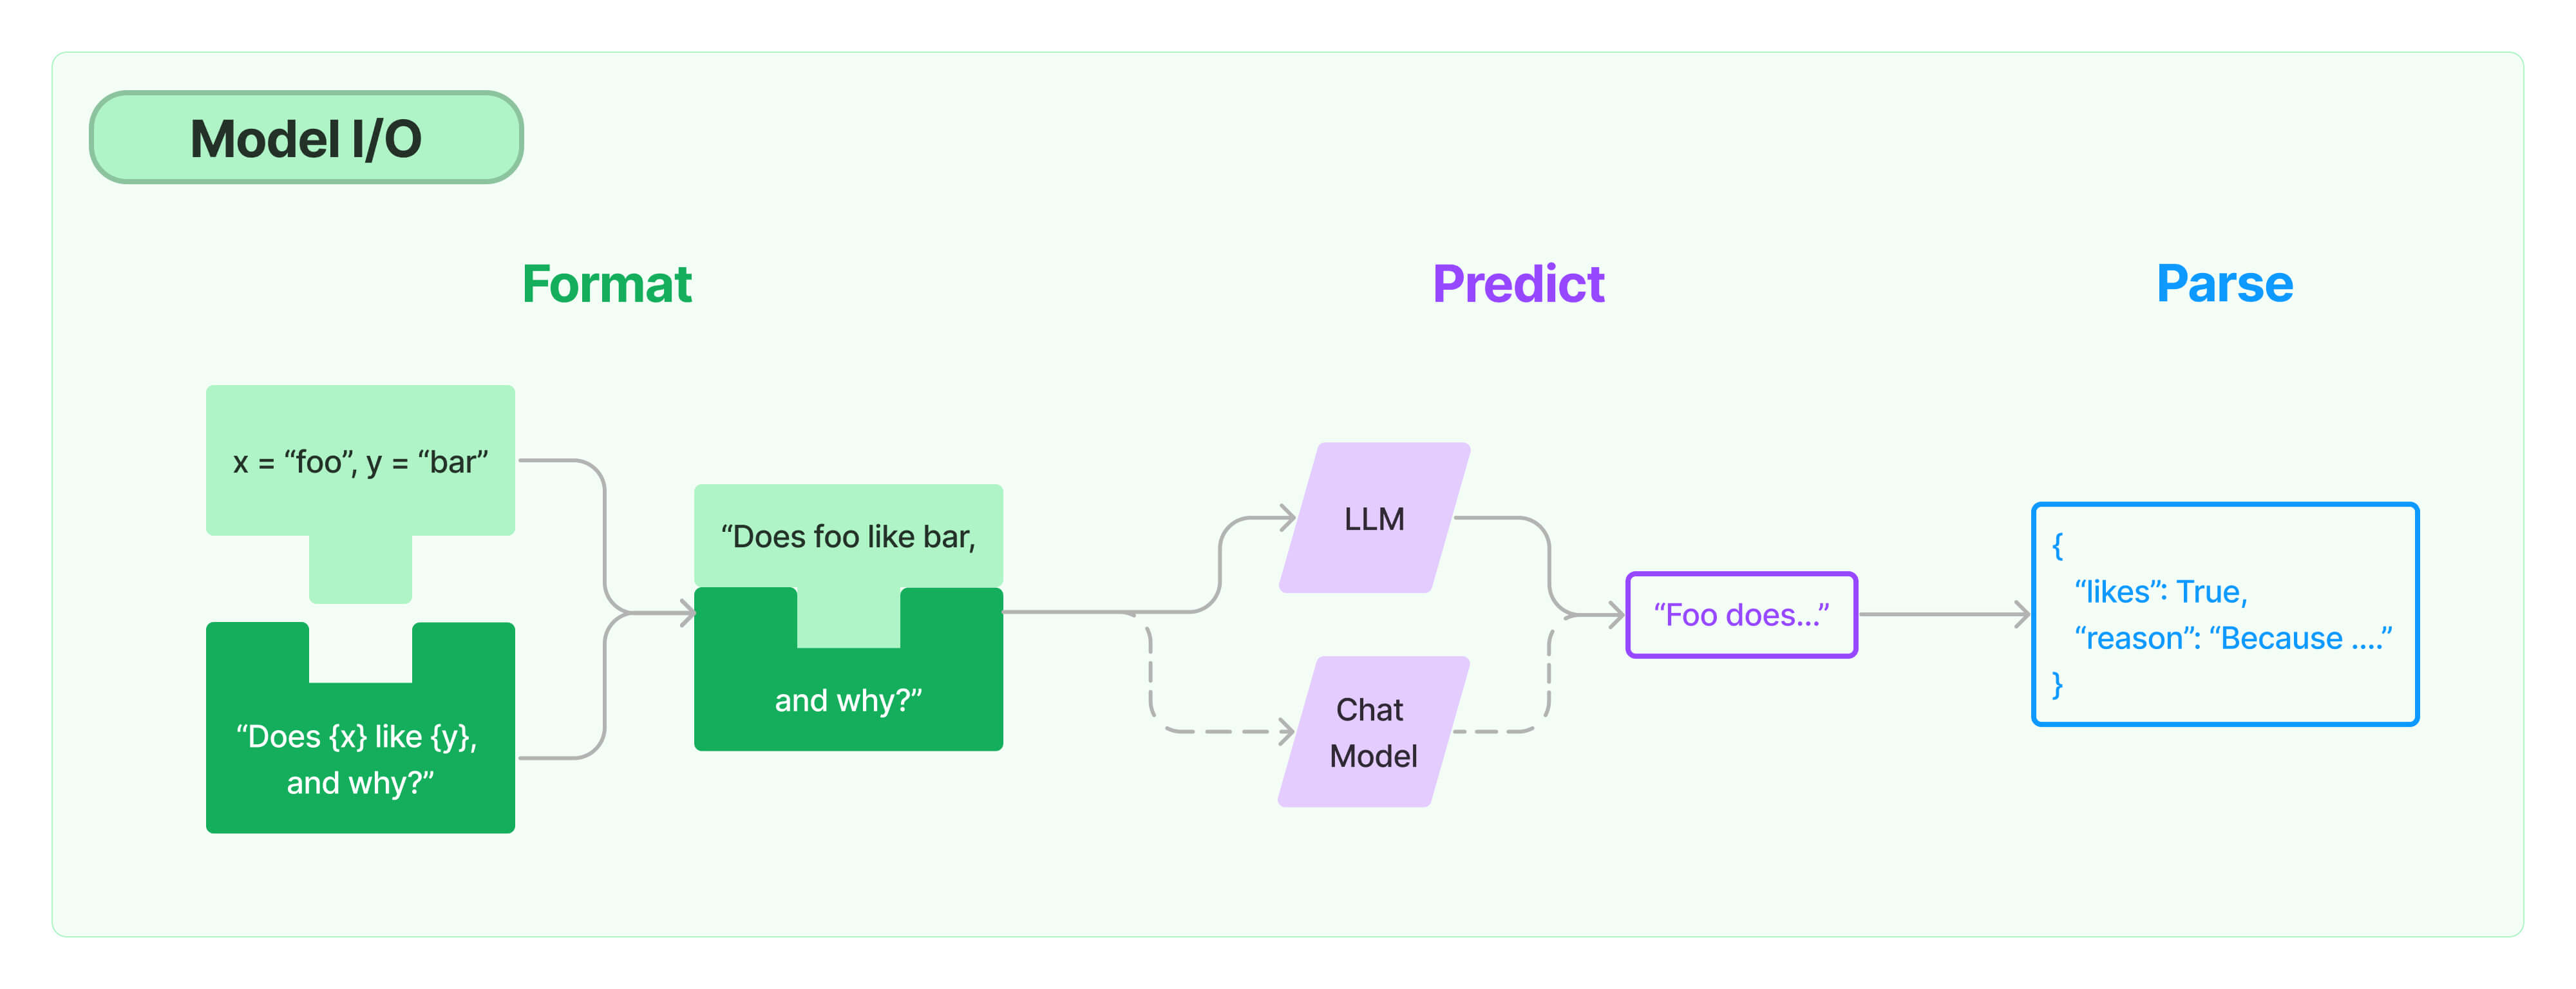

One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you. See this [link](https://python.langchain.com/docs/modules/data_connection/vectorstores/) from langchain docs.

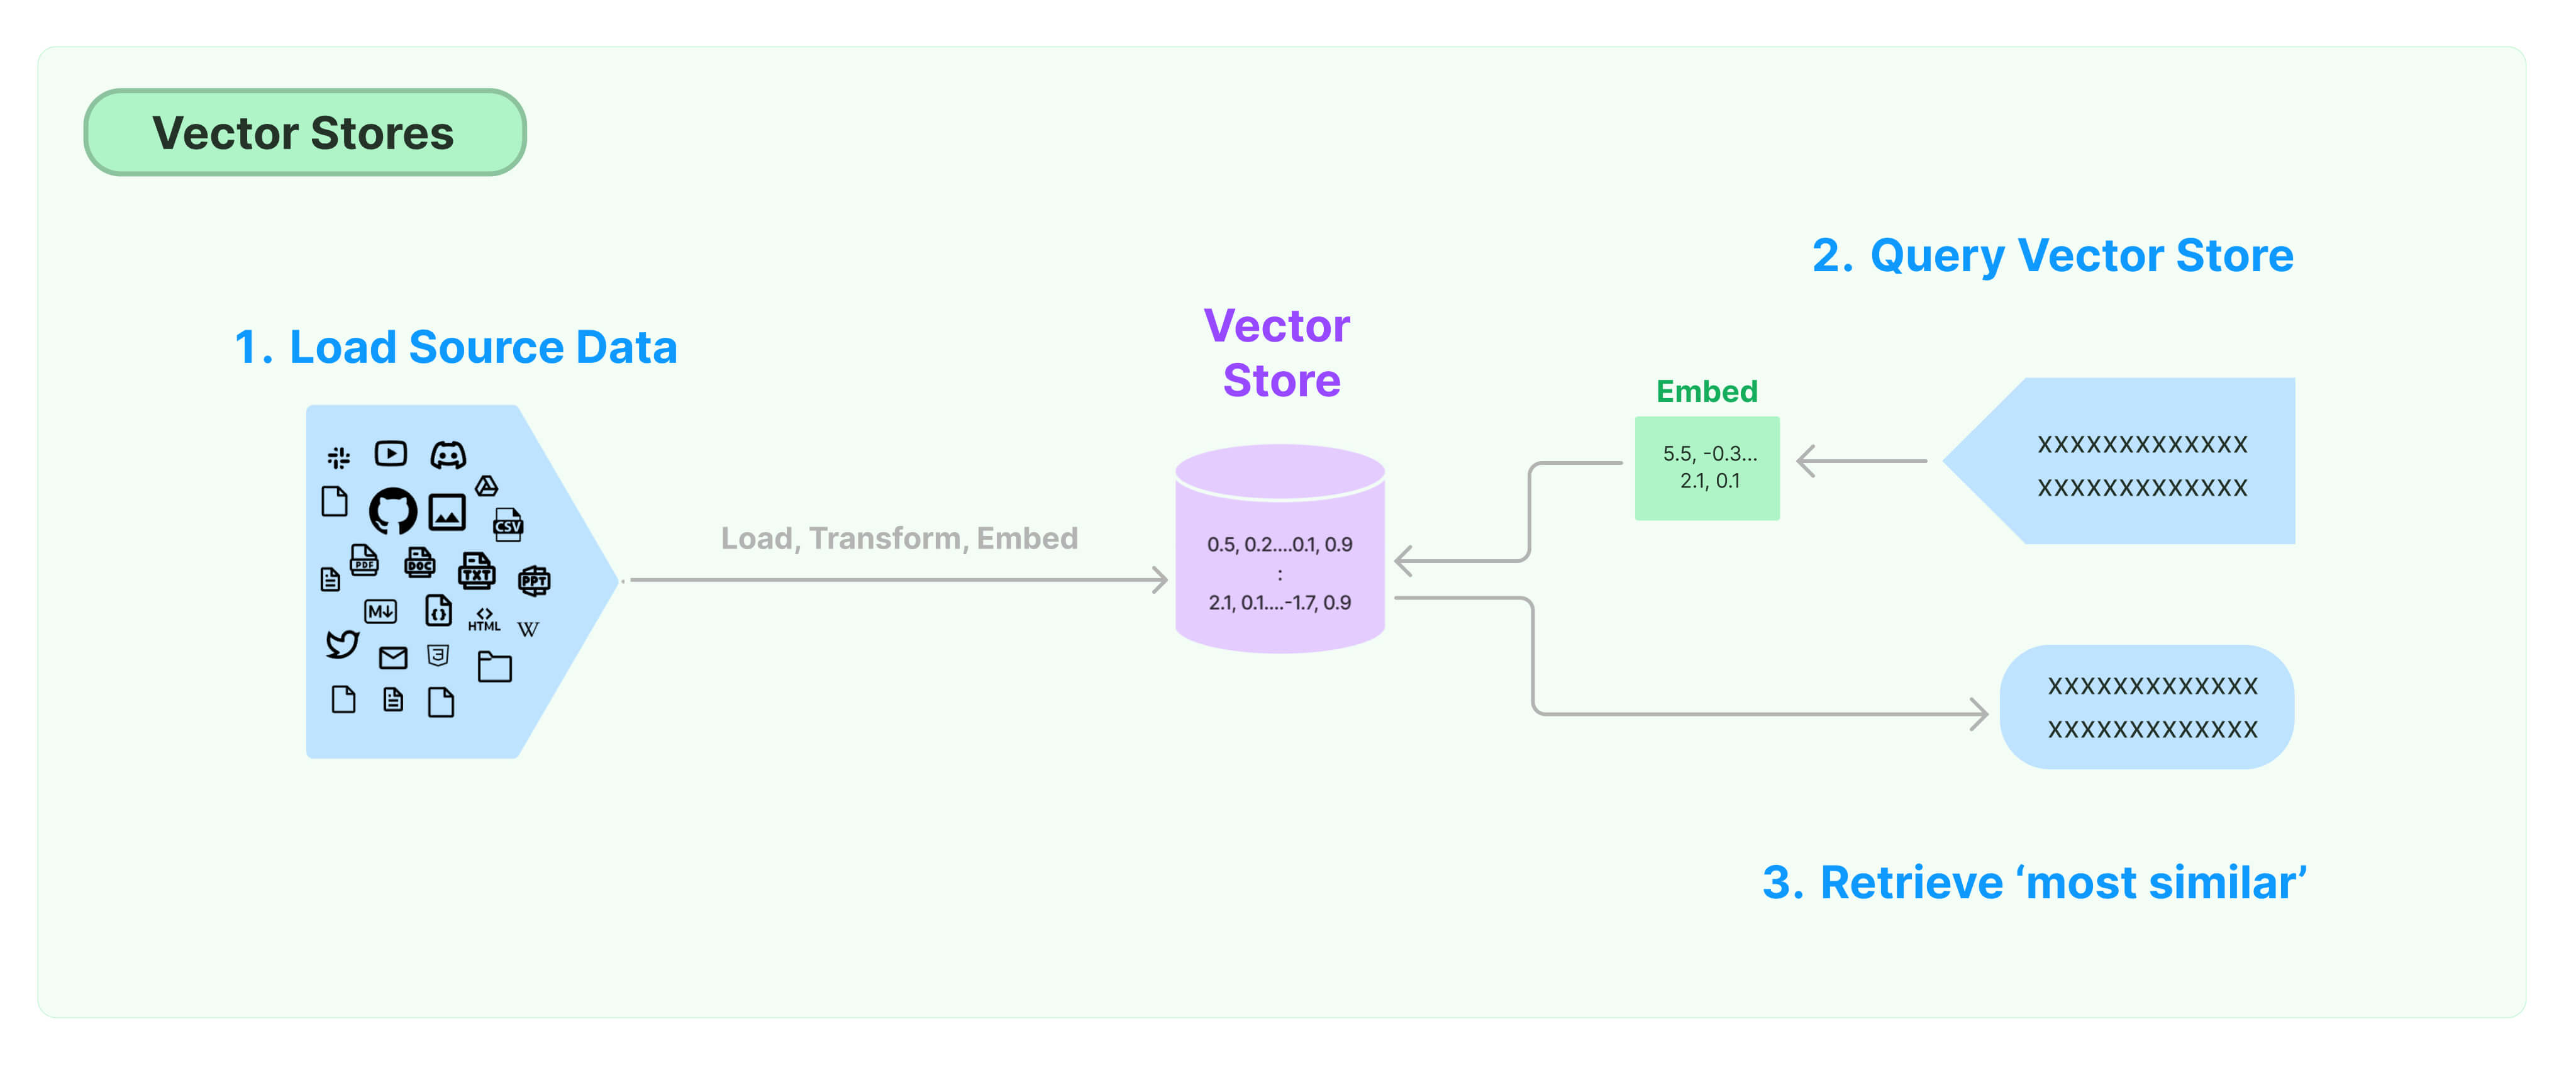

In [23]:

from langchain_community.document_loaders import WebBaseLoader

For recursive access of web-pages using `RecursiveUrlLoader`, please see this [link](https://python.langchain.com/docs/integrations/document_loaders/recursive_url/)

In [26]:
loader = WebBaseLoader("https://docs.smith.langchain.com/user_guide")

# Only one page is loaded.

docs = loader.load()
docs

[Document(page_content="\n\n\n\n\nLangSmith User Guide | \uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith\n\n\n\n\n\n\n\nSkip to main contentLangSmith API DocsSearchGo to AppQuick StartUser GuideTracingEvaluationProduction Monitoring & AutomationsPrompt HubProxyPricingSelf-HostingCookbookUser GuideOn this pageLangSmith User GuideLangSmith is a platform for LLM application development, monitoring, and testing. In this guide, we‚Äôll highlight the breadth of workflows LangSmith supports and how they fit into each stage of the application development lifecycle. We hope this will inform users how to best utilize this powerful platform or give them something to consider if they‚Äôre just starting their journey.Prototyping‚ÄãPrototyping LLM applications often involves quick experimentation between prompts, model types, retrieval strategy and other parameters.\nThe ability to rapidly understand how the model is performing ‚Äî and debug where it is failing ‚Äî is incredibly important for this phase.Debuggin

Next, we need to index it into a vectorstore. This requires a few components, namely an embedding model and a vectorstore. For embedding models, we once again provide examples for accessing via API or by running local models.

In [28]:
from langchain_community.embeddings import OllamaEmbeddings

embeddings = OllamaEmbeddings()
embeddings

OllamaEmbeddings(base_url='http://localhost:11434', model='llama2', embed_instruction='passage: ', query_instruction='query: ', mirostat=None, mirostat_eta=None, mirostat_tau=None, num_ctx=None, num_gpu=None, num_thread=None, repeat_last_n=None, repeat_penalty=None, temperature=None, stop=None, tfs_z=None, top_k=None, top_p=None, show_progress=False, headers=None, model_kwargs=None)

Now, we can use this embedding model to ingest documents into a vectorstore. We will use a simple local vectorstore, FAISS, for simplicity's sake.

In [29]:
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(docs)
vector = FAISS.from_documents(documents, embeddings)

Now that we have this data indexed in a vectorstore, we will create a retrieval chain. This chain will take an incoming question, look up relevant documents, then pass those documents along with the original question into an LLM and ask it to answer the original question.

First, let's set up the chain that takes a question and the retrieved documents and generates an answer.

In [31]:
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""")

document_chain = create_stuff_documents_chain(llm, prompt)

In [32]:
from langchain_core.documents import Document

document_chain.invoke({
    "input": "how can langsmith help with testing?",
    "context": [Document(page_content="langsmith can let you visualize test results")]
})

'\nBased on the provided context, Langsmith can help with testing by allowing users to visualize their test results. This means that Langsmith can provide a visual representation of the test data, making it easier for users to understand and analyze the results. This can be particularly useful in situations where large amounts of data are generated during testing, as it allows users to quickly identify patterns, trends, and anomalies in the data.'

In [33]:
from langchain.chains import create_retrieval_chain

retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [34]:
response = retrieval_chain.invoke({"input": "how can langsmith help with testing?"})
print(response["answer"])

# LangSmith offers several features that can help with testing:...


Based on the provided context, LangSmith can help with testing in several ways:

1. Beta Testing: LangSmith provides a platform for collecting more data on how an LLM application is performing in real-world scenarios. It allows developers to develop an understanding of the types of inputs the app is performing well or poorly on and how it's breaking down in those cases.
2. Annotating Traces: LangSmith supports sending runs to annotation queues, which allow annotators to closely inspect interesting traces and annotate them with respect to different criteria. This helps users catch regressions across important evaluation criteria.
3. Adding Runs to a Dataset: As the application progresses through the beta testing phase, it's essential to continue collecting data to refine and improve its performance. LangSmith enables users to add runs as examples to datasets, expanding test coverage on real-world scenarios.
4. Monitoring and A/B Testing: LangSmith provides monitoring charts that allow 